<a href="https://colab.research.google.com/github/dafrie/fin-disclosures-nlp/blob/master/notebooks/Preliminary_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preliminary results

Reports accuracy, F1-scores, TODO/DISCUSS: MCC (Matthews correlation coefficient) as well as the confusion matrices from various models:

- [Baseline using TF-IDF](https://colab.research.google.com/github/dafrie/fin-disclosures-nlp/blob/master/notebooks/CRO_Multi_Class_classification_with_TF_IDF.ipynb): 
    - Multinomial Naive Bayes
    - SVM

- [Transformers](https://colab.research.google.com/github/dafrie/fin-disclosures-nlp/blob/master/notebooks/CRO_Multi_Class_with_Transformers.ipynb):
    - BERT
    - RoBERTa

The input data are all labelled examples paragraphs and only contains paragraphs with CRO relevance - the (beforehand necessary) extraction task thus is **not** performed and the results/performance do not represent a real world scenario, since it is basically assumed that filtering works more or less 100%.

Note I: Since the test-set is currently missing, a 90%/10% sample split is used for the baseline models. For the transformer models, the validation performance is reported. The selected samples between the model categories are also not identical - once the test dataset is ready, a fair comparison should be possible.

Note II:
Since the dataset is unbalanced and there are multiple classes, the F1 score needs an averaging strategy. The numbers reported here are following a "macro" strategy, i.e. for each label the metrics are calculated and then the mean is reported. Imbalance between labels is not taken into account. Since there are just very few examples in the val/test set of PR/TR categories, this influences the F1 score

## Setup

In [53]:
# Config & Setup
BASELINE_RESULTS_FILE = "/content/drive/My Drive/fin-disclosures-nlp/data/labels/Firm_AnnualReport_100_results_baseline.pkl"
TRANSFORMERS_RESULTS_FILE = "/content/drive/My Drive/fin-disclosures-nlp/data/labels/Firm_AnnualReport_100_results.pkl"

COLUMNS_TO_RENDER = ["accuracy", "f1_score"]

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive


drive.mount('/content/drive')

df_base = pd.read_pickle(BASELINE_RESULTS_FILE)
df_transformers = pd.read_pickle(TRANSFORMERS_RESULTS_FILE)
df = df_base.append(df_transformers)
df = df.sort_values(["f1_score"], ascending=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Task I: Multi-Class classification of CRO

These are the evaluation results for each model on the task of assigning one of the three main CRO categories on each document.

In [52]:
df_I = df.query("category_level == 'cro'")
df_I[COLUMNS_TO_RENDER]

,transformer_model,accuracy,f1_score
model_id,,,
svm_cro,svm,0.978261,0.946139
bayes_cro,bayes,0.967391,0.928181
roberta-large_cro,roberta-large,0.934783,0.897276
bert-base-uncased_cro,bert-base-uncased,0.891304,0.819198


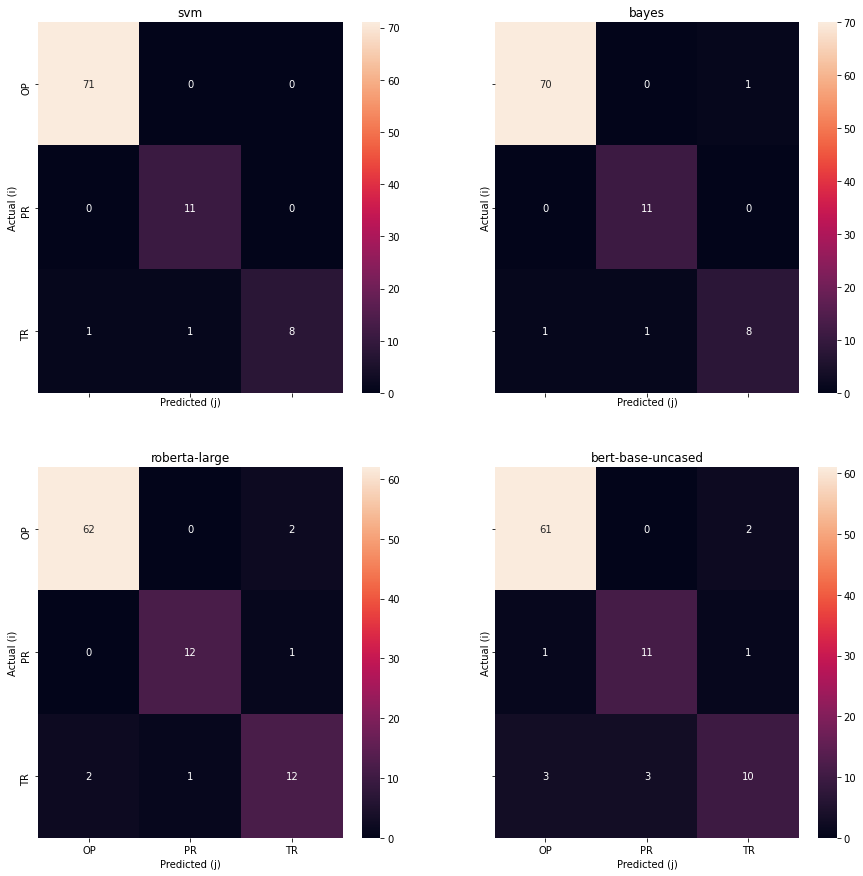

In [47]:
import math
def render_confusion_grid(df):
  figure, axes = plt.subplots(ncols=2, nrows=(math.ceil(len(df) / 2)), figsize=(15,15), sharex=True, sharey=True)
  for idx, ax in enumerate(axes.flat):
    subplot = sns.heatmap(df.confusion_matrix[idx], annot=True, ax=ax)
    subplot.set(title=f"{df.transformer_model[idx]}", xlabel="Predicted (j)", ylabel="Actual (i)")
  plt.show()

render_confusion_grid(df_I)

--> The baseline performs better

## Task II: Multi-Class classification of the CRO Sub-category

These are the evaluation results for each model on the task of assigning one of the 7 sub categories on each document.

In [54]:
df_II = df.query("category_level == 'cro_sub_type_combined'")
df_II[COLUMNS_TO_RENDER]

,accuracy,f1_score
model_id,,
roberta-large_cro_sub_type_combined,0.901099,0.705026
bayes_cro_sub_type_combined,0.824176,0.528352
svm_cro_sub_type_combined,0.780220,0.478488
bert-base-uncased_cro_sub_type_combined,0.769231,0.450868


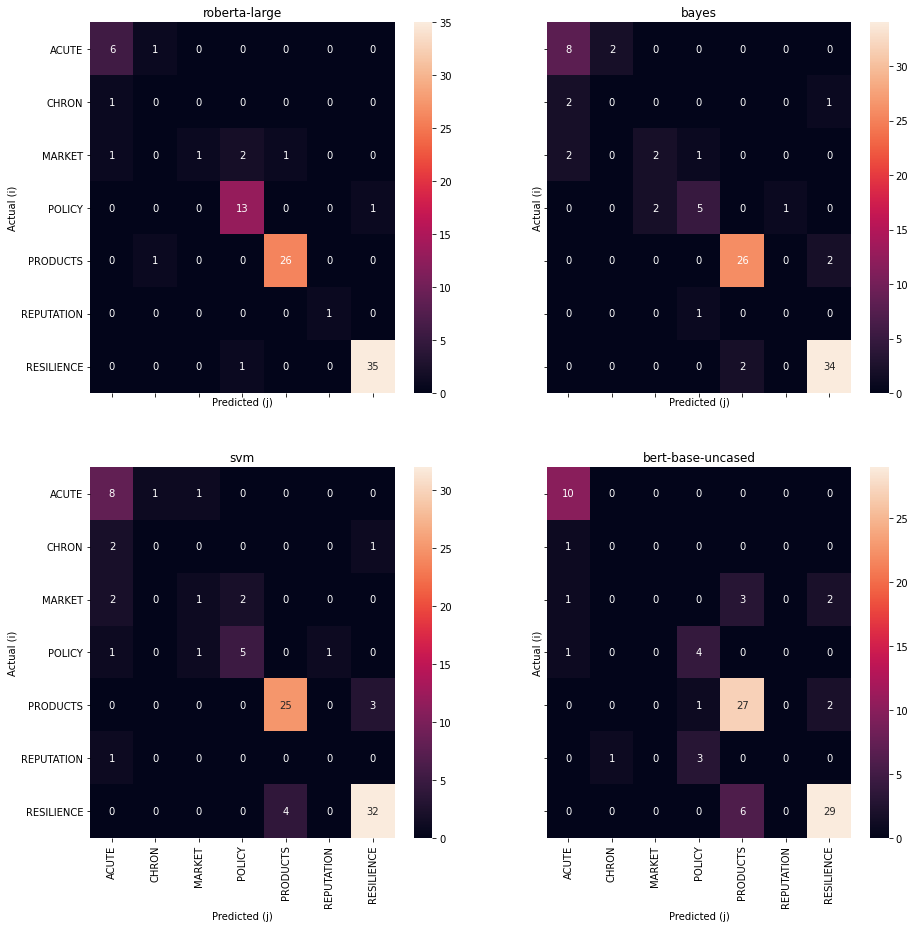

In [49]:
render_confusion_grid(df_II)

--> RoBERTa with default params seems to perform fairly good in comparison to BERT and also the baselines, however the right choice of parameters seems paramount. Need more data

# Multi-Label

TODO: Assign zero, one or more label to each document ("tagging").

## Task III: Multi-Label classification of CRO Sub-category

These are the evaluation results for each model on the task of assigning zero, one or multiple CRO sub-categrories to each document.